# Machine Learning: Assignment 1

In [1]:
import numpy as np
import pandas as pd
import time
import gc
import random
from sklearn.model_selection import cross_val_score, GridSearchCV, cross_validate, train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score
from sklearn.datasets import make_classification
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import validation_curve
from sklearn.neural_network import MLPClassifier
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Data Import, leansing Setup and helper functions

Heatmap for Features


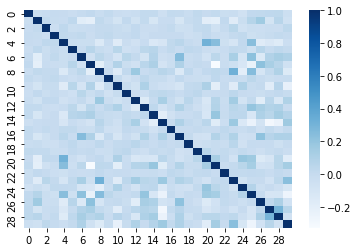

In [2]:
class Data():
    def dataAllocation(self,path):
        # df = pd.read_csv(path)
        # x_data = df.iloc[:, :-1]
        # y_data = df.iloc[:, -1 ]
        # return x_data,y_data
        X, y = make_classification(n_samples=2000, n_features=30, n_informative=20, n_redundant=0, random_state=6)
        return X, y
    def trainSets(self,x_data,y_data):
        x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size = 0.3, random_state = 614, shuffle = True)
        return x_train, x_test, y_train, y_test

data = 'data/pima-indians-diabetes.csv'
dataset = Data()
x_data,y_data = dataset.dataAllocation(data)
x_train, x_test, y_train, y_test = dataset.trainSets(x_data,y_data)
print("Heatmap for Features")
data_corr = sns.heatmap(pd.DataFrame(x_train).corr(), cmap='Blues')

# 2. Decision Tree Classifier

In [5]:
class DTClassifier():

    def trainTest(self,x_train,x_test, y_train):
        df = []
        for i in range(16):
            for j in range(20):
                dt_clf = DecisionTreeClassifier(max_depth=i+1, min_samples_leaf=j+1, random_state = 614)
                dt_clf.fit(x_train, y_train)
                
                y_predict_train = dt_clf.predict(x_train)
                y_predict_test = dt_clf.predict(x_test)
                df.append([i+1, j+1, "Train", f1_score(y_train, y_predict_train)])
                df.append([i+1, j+1, "Test", f1_score(y_test, y_predict_test)])

        return pd.DataFrame(df, columns=["Depth", "Leaf Size", "Sample Type", "F1 Score" ])

    # def trainTest(self,x_train,x_test, y_train):

    #     params = ["Maximum Depth", "Minimum Leaf"]
    #     dfs= []
    #     for param in params:
    #         f1_scores_tests = []
    #         f1_scores_trains = []
    #         max_depths = [x for x in range(1,21)]
            
    #         for i in max_depths:
    #             if param == "Maximum Depth":
    #                 dt_clf = DecisionTreeClassifier(max_depth = i, random_state = 614)
    #             else:
    #                 dt_clf = DecisionTreeClassifier(min_samples_leaf = i, random_state = 614)
    #             dt_clf.fit(x_train, y_train)
                
    #             y_predict_train = dt_clf.predict(x_train)
    #             y_predict_test = dt_clf.predict(x_test)
                
    #             f1_scores_trains.append(f1_score(y_train, y_predict_train))
    #             f1_scores_tests.append(f1_score(y_test, y_predict_test))
    #         dfs.append(pd.DataFrame({param: max_depths, "Training F1 Scores": f1_scores_trains, "Testing F1 Scores": f1_scores_tests}))

    #     return dfs[0], dfs[1]
    
    def hyperParameterTuning(self,x_train,y_train):
        param_grid = {'min_samples_leaf': range(1, 21), 'max_depth': range(1, 21) }
        tune = GridSearchCV(estimator = DecisionTreeClassifier(), param_grid = param_grid, cv=5)
        return tune.fit(x_train, y_train)
    
    def bestParams(self,gscv_dtc):
        best_params = gscv_dtc.best_params_
        return best_params

    def bestScore(self,gscv_dtc):
        best_score = gscv_dtc.best_score_
        return best_score

In [6]:
dt = DTClassifier()

In [7]:
df = dt.trainTest(x_train, x_test, y_train)
df.shape


1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251 252 253 254 255 256 257 258 259 260 261 262 263 264 265 266 267 268 269 270 271 272 273 274 275 276 277 

(640, 4)

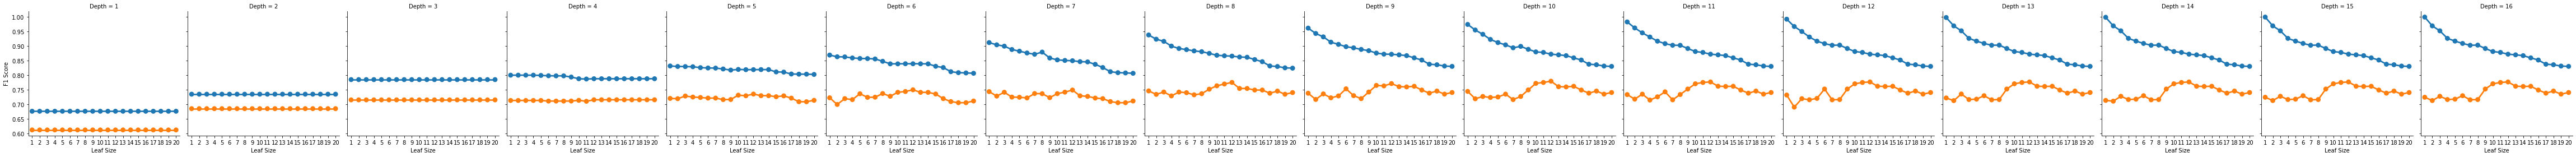

In [8]:
g = sns.FacetGrid(df, hue="Sample Type", col="Depth", height=4)
g.map(sns.pointplot, "Leaf Size", "F1 Score" )

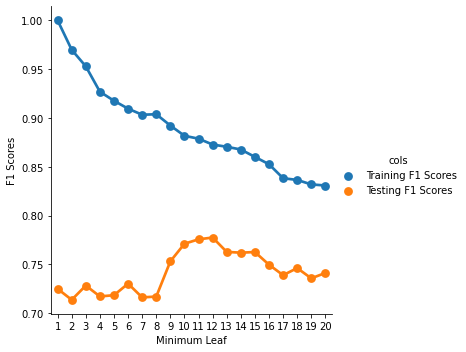

In [13]:
df_depth, df_leaf = dt.trainTest(x_train, x_test, y_train)
df_melt = df_leaf.melt("Minimum Leaf", var_name="cols", value_name="F1 Scores")
plot = sns.factorplot(data=df_melt, x="Minimum Leaf", y="F1 Scores", hue="cols")

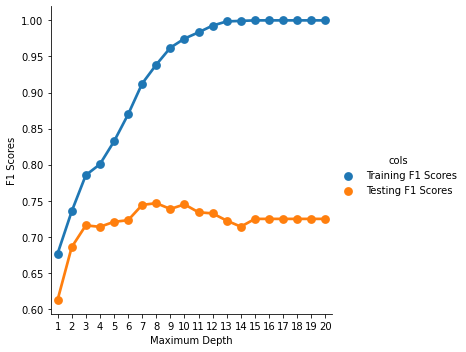

In [14]:
df_melt = df_depth.melt("Maximum Depth", var_name="cols", value_name="F1 Scores")
plot = sns.factorplot(data=df_melt, x="Maximum Depth", y="F1 Scores", hue="cols")

In [15]:
gscv_dtc = dt.hyperParameterTuning(x_train,y_train)
print("Decision Tree Best Parameters: ",dt.bestParams(gscv_dtc))
print("Decision Tree Best Score: ",dt.bestScore(gscv_dtc))

Decision Tree Best Parameters:  {'max_depth': 7, 'min_samples_leaf': 16}
Decision Tree Best Score:  0.7564285714285715


# 3. Support Vector Machine

In [15]:
class SupportVectorMachine():
    def dataPreProcess(self,x_train,x_test):
        scaler = StandardScaler()
        scaled_x_train = scaler.fit_transform(x_train)
        scaled_x_test = scaler.transform(x_test)
        return scaled_x_train, scaled_x_test

    def trainTest(self,x_train, x_test, y_train):
        scaler = StandardScaler()
        scaled_x_train = scaler.fit_transform(x_train)
        scaled_x_test = scaler.transform(x_test)
        model = SVC(kernel = "linear")
        model.fit(scaled_x_train,y_train)
        y_predict_train = model.predict(scaled_x_train)
        y_predict_test = model.predict(scaled_x_test)
        return model, y_predict_train,y_predict_test

    def SVCTrainAccuracy(self,y_train,y_predict_train):
        train_accuracy = accuracy_score(y_predict_train, y_train)
        return train_accuracy

    def SVCTestAccuracy(self,y_test,y_predict_test):
        test_accuracy = accuracy_score(y_predict_test, y_test)
        return test_accuracy

    def SVMBestScore(self, scaled_x_train, y_train):
        svm_parameters = {'C':[0.01, 0.1, 1.0]}
        svm_tune = SVC(gamma = "auto")
        svm_cv = GridSearchCV(estimator = svm_tune, param_grid = svm_parameters, n_jobs=-1, return_train_score=True)
        svm_cv.fit(scaled_x_train, y_train)
        best_score = svm_cv.best_score_
        print(svm_cv.best_params_)
        return svm_cv, best_score

    def SVCClassifierParam(self,svm_cv,scaled_x_train,scaled_x_test,y_train):
        y_predict_train = svm_cv.predict(scaled_x_train)
        y_predict_test = svm_cv.predict(scaled_x_test)
        return y_predict_train, y_predict_test

    def svcTrainAccuracy(self,y_train,y_predict_train):
        train_accuracy = accuracy_score(y_predict_train, y_train)
        return train_accuracy

    def svcTestAccuracy(self,y_test,y_predict_test):
        test_accuracy = accuracy_score(y_predict_test, y_test)
        return test_accuracy

    def SVMRankTestScore(self,svm_cv):
        rank_test_score = svm_cv.cv_results_['rank_test_score']
        return rank_test_score

    def SVMMeanTestScore(self,svm_cv):
        mean_test_score = svm_cv.cv_results_['mean_test_score']
        return mean_test_score

svm = SupportVectorMachine()
y_predict_train,y_predict_test = svm.SVCClassifier(scaled_x_train,scaled_x_test, y_train)
print("Support Vector Machine Trainn Accuracy: ",svm.SVCTrainAccuracy(y_train,y_predict_train))
print("Support Vector Machine Test Accuracy: ",svm.SVCTestAccuracy(y_test,y_predict_test))
svm_cv, best_score = svm.SVMBestScore(scaled_x_train, y_train)
print("Support Vector Machine Best Score: ", best_score)
y_predict_train,y_predict_test = svm.SVCClassifierParam(svm_cv,scaled_x_train,scaled_x_test,y_train)
print("Support Vector Machine Train Accuracy: ",svm.svcTrainAccuracy(y_train,y_predict_train))
print("Support Vector Machine Test Accuracy: ",svm.svcTestAccuracy(y_test,y_predict_test))
print("Support Vector Machine Rank Test Score: ",svm.SVMRankTestScore(svm_cv))
print("Support Vector Machine Mean Test Score: ",svm.SVMMeanTestScore(svm_cv))

In [16]:
classifiers = [DTClassifier(), SupportVectorMachine()]
for classifier in classifiers:
    model, y_predict_train,y_predict_test = classifier.trainTest(x_train, x_test, y_train)
    print(classification_report(y_test,y_predict_test))
    print(confusion_matrix(y_test,y_predict_test))



              precision    recall  f1-score   support

           0       0.75      0.71      0.73       297
           1       0.73      0.77      0.75       303

    accuracy                           0.74       600
   macro avg       0.74      0.74      0.74       600
weighted avg       0.74      0.74      0.74       600

[[210  87]
 [ 69 234]]
              precision    recall  f1-score   support

           0       0.77      0.80      0.79       297
           1       0.80      0.77      0.78       303

    accuracy                           0.78       600
   macro avg       0.78      0.78      0.78       600
weighted avg       0.78      0.78      0.78       600

[[238  59]
 [ 71 232]]


# 4. KNN

In [5]:
class KNN():
    def kNeighborsClassifier(self,x_train,x_test, y_train, n_neighbors):
        dt_clf = KNeighborsClassifier(n_neighbors = n_neighbors)
        dt_clf.fit(x_train, y_train)
        y_predict_train = dt_clf.predict(x_train)
        y_predict_test = dt_clf.predict(x_test)
        return dt_clf,y_predict_train, y_predict_test
    
    def dtTrainAccuracy(self,y_train,y_predict_train):
        train_accuracy = accuracy_score(y_predict_train, y_train)
        return train_accuracy
    
    def dtTestAccuracy(self,y_test,y_predict_test):
        test_accuracy = accuracy_score(y_predict_test, y_test)
        return test_accuracy

    def hyperParameterTuning(self,x_train,y_train):
        train_scores, test_scores = validation_curve(KNeighborsClassifier(), x_train, y_train, param_name="n_neighbors", param_range=range(1, 50), cv=5)
        return np.argmax(np.mean(test_scores, axis=1)) + 1
    
    
dt = KNN()
dt_clf,y_predict_train, y_predict_test = dt.kNeighborsClassifier(x_train,x_test, y_train, 3)
print("Decision Tree Train Accuracy: ",dt.dtTrainAccuracy(y_train,y_predict_train))
print("Decision Tree Test Accuracy: ",dt.dtTestAccuracy(y_test,y_predict_test))
n_neighbors_tuned = dt.hyperParameterTuning(x_train,y_train)
print("Optimal n_neighbors: ", n_neighbors_tuned)
dt_clf,y_predict_train, y_predict_test = dt.kNeighborsClassifier(x_train,x_test, y_train, n_neighbors_tuned)
print("Decision Tree Train Accuracy: ",dt.dtTrainAccuracy(y_train,y_predict_train))
print("Decision Tree Test Accuracy: ",dt.dtTestAccuracy(y_test,y_predict_test))


Decision Tree Train Accuracy:  0.9442857142857143
Decision Tree Test Accuracy:  0.8933333333333333
Optimal n_neighbors:  5
Decision Tree Train Accuracy:  0.9342857142857143
Decision Tree Test Accuracy:  0.9033333333333333


# 5. Neural Network

In [6]:
class NN():
    def dataPreProcess(self,x_train,x_test):
        scaler = StandardScaler()
        scaled_x_train = scaler.fit_transform(x_train)
        scaled_x_test = scaler.transform(x_test)
        return scaled_x_train, scaled_x_test

    def mlpClassifier(self,scaled_x_train,scaled_x_test, y_train):
        model = MLPClassifier(max_iter=100)

        model.fit(scaled_x_train,y_train)
        y_predict_train = model.predict(scaled_x_train)
        y_predict_test = model.predict(scaled_x_test)
        return y_predict_train, y_predict_test, model

    def mlpTrainAccuracy(self,y_train,y_predict_train):
        train_accuracy = accuracy_score(y_predict_train, y_train)
        return train_accuracy

    def mlpTestAccuracy(self,y_test,y_predict_test):
        test_accuracy = accuracy_score(y_predict_test, y_test)
        return test_accuracy
    
    def mlpBestScore(self, scaled_x_train, scaled_x_test, y_train, y_test, model):
        mlp_parameters = {
            'hidden_layer_sizes': [(10,30,10),(20,)],
            'activation': ['tanh', 'relu'],
            'solver': ['sgd', 'adam'],
            'alpha': [0.0001, 0.05],
            'learning_rate': ['constant','adaptive'],
        }
        mlp_cv = GridSearchCV(model, mlp_parameters)
        mlp_cv.fit(scaled_x_train, y_train)
        return mlp_cv, mlp_cv.predict(scaled_x_test)
    
    def optimizedTestAccuracy(self,y_test,y_predict_test):
        test_accuracy = accuracy_score(y_predict_test, y_test)
        return test_accuracy 

nn = NN()
scaled_x_train, scaled_x_test = nn.dataPreProcess(x_train,x_test)
y_predict_train,y_predict_test, model = nn.mlpClassifier(scaled_x_train,scaled_x_test, y_train)
print("Neural Network Train Accuracy: ",nn.mlpTrainAccuracy(y_train,y_predict_train))
print("Neural Network Test Accuracy: ",nn.mlpTestAccuracy(y_test,y_predict_test))
nn_tuned, y_predict_test_optimized = nn.mlpBestScore(scaled_x_train, scaled_x_test, y_train, y_test, model)
print("Neural Network Optimized Test Accuracy: ", nn.optimizedTestAccuracy(y_test, y_predict_test_optimized))


Neural Network Train Accuracy:  0.9728571428571429
Neural Network Test Accuracy:  0.935
Neural Network Optimized Test Accuracy:  0.895


# 6. Boost

In [7]:
class Boost():
    def dataPreProcess(self,x_train,x_test):
        scaler = StandardScaler()
        scaled_x_train = scaler.fit_transform(x_train)
        scaled_x_test = scaler.transform(x_test)
        return scaled_x_train, scaled_x_test

    def gradientBoostingClassifier(self,scaled_x_train,scaled_x_test, y_train):
        model = GradientBoostingClassifier()

        model.fit(scaled_x_train,y_train)
        y_predict_train = model.predict(scaled_x_train)
        y_predict_test = model.predict(scaled_x_test)
        return y_predict_train, y_predict_test, model

    def gbTrainAccuracy(self,y_train,y_predict_train):
        train_accuracy = accuracy_score(y_predict_train, y_train)
        return train_accuracy

    def gbTestAccuracy(self,y_test,y_predict_test):
        test_accuracy = accuracy_score(y_predict_test, y_test)
        return test_accuracy
    

boost = Boost()
scaled_x_train, scaled_x_test = boost.dataPreProcess(x_train,x_test)
y_predict_train,y_predict_test, model = boost.gradientBoostingClassifier(scaled_x_train,scaled_x_test, y_train)
print("Boosting Train Accuracy: ",boost.gbTrainAccuracy(y_train,y_predict_train))
print("Boosting Test Accuracy: ",boost.gbTestAccuracy(y_test,y_predict_test))

Boosting Train Accuracy:  0.96
Boosting Test Accuracy:  0.8633333333333333
